In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

### Загружаем незаполненные данные

In [2]:
df = pd.read_csv('training_df_unfilled_2.09.csv')
df.contract_penalty_percentage.fillna(0.001, inplace=True)

#### Убираем данные с пропусками

In [3]:
df = df[df.contract_price.notnull()]
df = df[df.delay.notnull()]
df.shape

(83, 11)

### Переводим категориальные данные в one-hot вектора

In [32]:
def transform_into_onehot(column_name, df):
    encoding_dict = {
        c: i for (i, c) in enumerate(df[column_name].unique())
    }
    encoded = np.zeros((len(df), len(encoding_dict)))
    for i, val in enumerate(df[column_name]):
        one_place = encoding_dict[val]
        encoded[i][one_place] = 1
    return encoded

In [33]:
encoded_type_of_contract = transform_into_onehot('type_of_contract', df)
encoded_appeal_courts = transform_into_onehot('appeal_courts', df)
encoded_judge_gender = transform_into_onehot('judge_gender', df)
encoded_year = transform_into_onehot('year', df)

### Собираем признаки воедино

In [34]:
features = df[['claimed_penalty', 'contract_penalty_percentage', 'contract_price', 'delay']].values

In [35]:
features = np.hstack([features, encoded_type_of_contract, encoded_appeal_courts, encoded_judge_gender, encoded_year])

### Визуализация

In [36]:
colors = [
    ('blue' if ratio == 0
     else ('cyan' if ratio < 0.2
         else ('lime' if ratio < 0.4
           else ('orange' if ratio < 0.6
                 else ('orangered' if ratio < 0.85 else 'red')))))
    for ratio in df.penalty_reduction_ratio
]

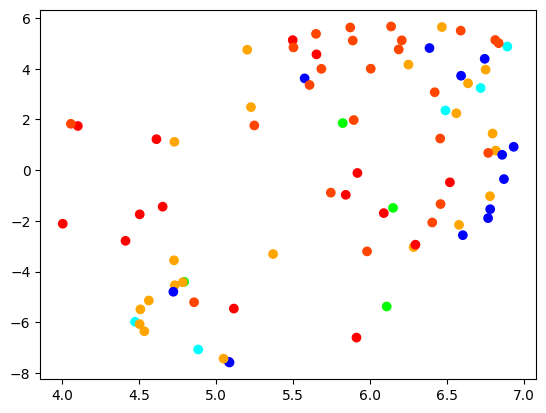

In [37]:
tsne = TSNE()
x = tsne.fit_transform(features)
plt.scatter(x[:, 0], x[:, 1], c=colors)
plt.show()